# Предисловие

Перед написанием кода ниже вручную проделано следующее: 
- два столбца КГФ приведены в один в соответствии с одной единицей измерения
- удалены строки с пустыми значениями обоих столбцов G_total и КГФ
- удалены строки со значением "не спускался"
- пропуски заполнены NaN

# Первичная обработка данных

Импорт необходимых библиотек для работы с данными

In [1]:
import random
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import datetime

Читаем датасет, удаляем первую строку, переименовываем первые два столбца

In [2]:
df = pd.read_excel('files/dataset.xlsx', sheet_name='VU', header=0, skiprows=1)
df.drop(0, inplace=True)
df.rename({'Unnamed: 0':'Номер', 'Unnamed: 1':'Дата'}, axis=1, inplace=True)
df.head()

,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,...,56.5,NaN,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,...,56.5,NaN,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,...,56.5,NaN,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,...,56.5,NaN,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,...,56.5,NaN,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486


# 

Выполним первичное преобразование к одному типу данных - float

In [3]:
df['Дата'] = df['Дата'].apply(lambda x: (pd.to_datetime(x) - datetime.datetime(1970, 1, 1)).total_seconds())
df = df.astype(float)
df.dtypes

Номер                             float64
Дата                              float64
Глубина манометра                 float64
Dшт                               float64
Руст                              float64
Рзаб                              float64
Pлин                              float64
Руст.1                            float64
Рзаб.1                            float64
Рлин                              float64
Туст                              float64
Тна шлейфе                        float64
Тзаб                              float64
Tлин                              float64
Дебит газа                        float64
Дебит ст. конд.                   float64
Дебит воды                        float64
Дебит смеси                       float64
Дебит гааз                        float64
Дебит кон нестабильный            float64
Дебит воды.1                      float64
Нэф                               float64
Рпл. Тек (послед точка на КВД)    float64
Рпл. Тек (Расчет по КВД)          

# Гистограмма важности признаком по критерию gain_ratio

In [4]:
classNumber = 3
tPower = df.shape[0]
df['Класс'] = np.random.randint(0, classNumber, df.shape[0])
df.head()

,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,Класс
1,804.0,1.212624e+09,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,1
2,804.0,1.212710e+09,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,1
3,804.0,1.212797e+09,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,2
4,804.0,1.212883e+09,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99.0,...,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,0
5,804.0,1.212970e+09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,...,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,2


In [5]:
def calcInfo(t):
    tempDf = pd.DataFrame(index=df.columns)
    tempDf['info'] = 0
    for c in range(classNumber):
        freqj = t[t['Класс'] == c].shape[0]
        if freqj != 0:
            tempDf['info'] = tempDf['info'] - (freqj/tPower) * np.log2(freqj/tPower)

    return tempDf['info']

In [6]:
calcInfo(df)

Номер                             1.561382
Дата                              1.561382
Глубина манометра                 1.561382
Dшт                               1.561382
Руст                              1.561382
Рзаб                              1.561382
Pлин                              1.561382
Руст.1                            1.561382
Рзаб.1                            1.561382
Рлин                              1.561382
Туст                              1.561382
Тна шлейфе                        1.561382
Тзаб                              1.561382
Tлин                              1.561382
Дебит газа                        1.561382
Дебит ст. конд.                   1.561382
Дебит воды                        1.561382
Дебит смеси                       1.561382
Дебит гааз                        1.561382
Дебит кон нестабильный            1.561382
Дебит воды.1                      1.561382
Нэф                               1.561382
Рпл. Тек (послед точка на КВД)    1.561382
Рпл. Тек (Р

In [7]:
def calcInfoXandSplit(t):
    tempDf = pd.DataFrame(index=df.columns)
    tempDf['infoX'] = 0
    tempDf['split'] = 0

    for X in df.columns:
        for A in df[X].unique():
            ti = t[t[X] == A]
            tiPower = ti.shape[0]
            tempDf.loc[[X], 'infoX'] = tempDf.loc[[X], 'infoX'] + (tiPower/tPower) * calcInfo(ti).loc[X]
            if tiPower != 0:
                tempDf.loc[[X], 'split'] = tempDf.loc[[X], 'split'] - (tiPower/tPower) * np.log2(tiPower/tPower)

    return tempDf['infoX'], tempDf['split']

In [8]:
infoX, split = calcInfoXandSplit(df)
infoX

Номер                             0.605175
Дата                              0.077318
Глубина манометра                 0.319766
Dшт                               0.642198
Руст                              0.079254
Рзаб                              0.073389
Pлин                              0.074658
Руст.1                            0.104770
Рзаб.1                            0.071817
Рлин                              0.079496
Туст                              0.166309
Тна шлейфе                        0.051384
Тзаб                              0.111510
Tлин                              0.076835
Дебит газа                        0.071514
Дебит ст. конд.                   0.071514
Дебит воды                        0.103800
Дебит смеси                       0.068371
Дебит гааз                        0.073086
Дебит кон нестабильный            0.076229
Дебит воды.1                      0.185489
Нэф                               0.510482
Рпл. Тек (послед точка на КВД)    0.279781
Рпл. Тек (Р

In [9]:
def calcGainRatio(df):
    grDf = pd.DataFrame(index=df.columns)
    grDf['info'] = calcInfo(df)
    grDf['info_x'], grDf['split'] = calcInfoXandSplit(df)
    grDf['gain_ratio'] = (grDf['info'] - grDf['info_x']) / grDf['split']
    return grDf.sort_values(by='gain_ratio', ascending=False)

In [10]:
calcGainRatio(df)

,info,info_x,split,gain_ratio
Ro_w,1.561382,0.205803,0.495209,2.737388
Ro_g,1.561382,0.082254,0.991856,1.491273
G_total,1.561382,0.017289,1.573313,0.981427
Класс,1.561382,0.521357,1.561382,0.666093
Рпл. Тек (Карноухов),1.561382,0.218416,2.896660,0.463626
Тна шлейфе,1.561382,0.051384,4.224920,0.357403
Рпл. Тек (Расчет по КВД),1.561382,0.288110,3.665513,0.347365
Номер,1.561382,0.605175,2.855401,0.334876
Dшт,1.561382,0.642198,2.799331,0.328358
Нэф,1.561382,0.510482,3.326868,0.315883


In [11]:
df.drop(['Класс'], axis=1, inplace=True)

# Тепловая карта признаков

<AxesSubplot:>

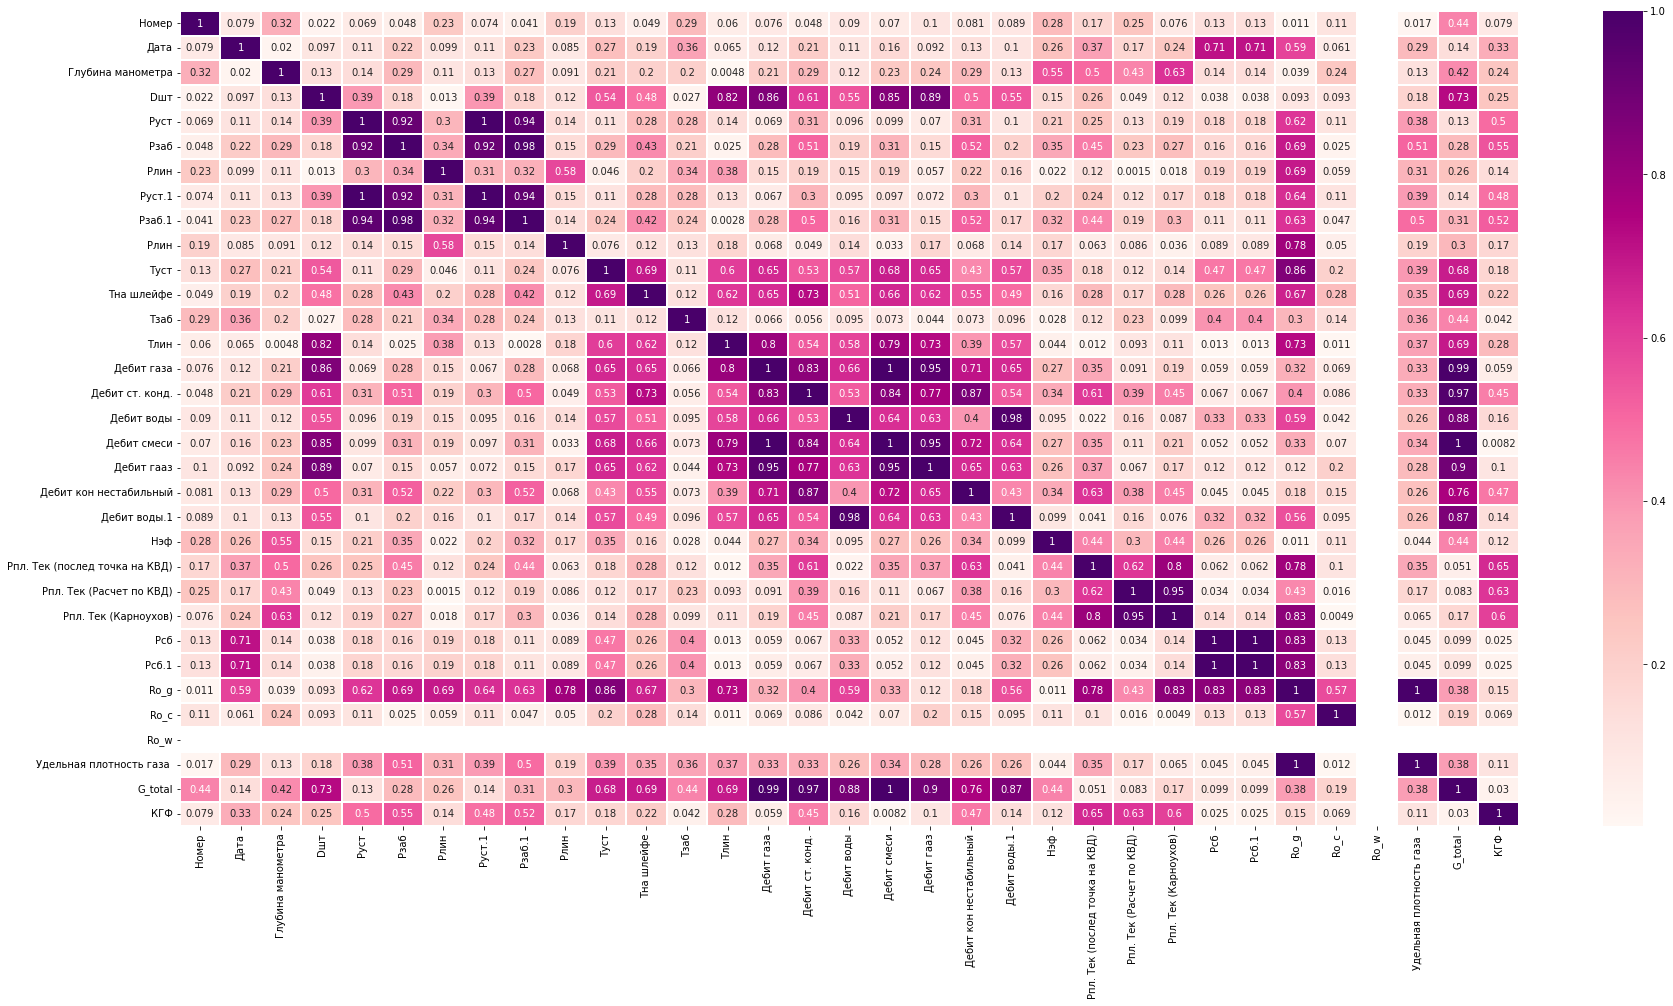

In [12]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(abs(df.corr()), annot=True, linewidths=.2, cmap='RdPu')

# Графики распределений для каждого признака

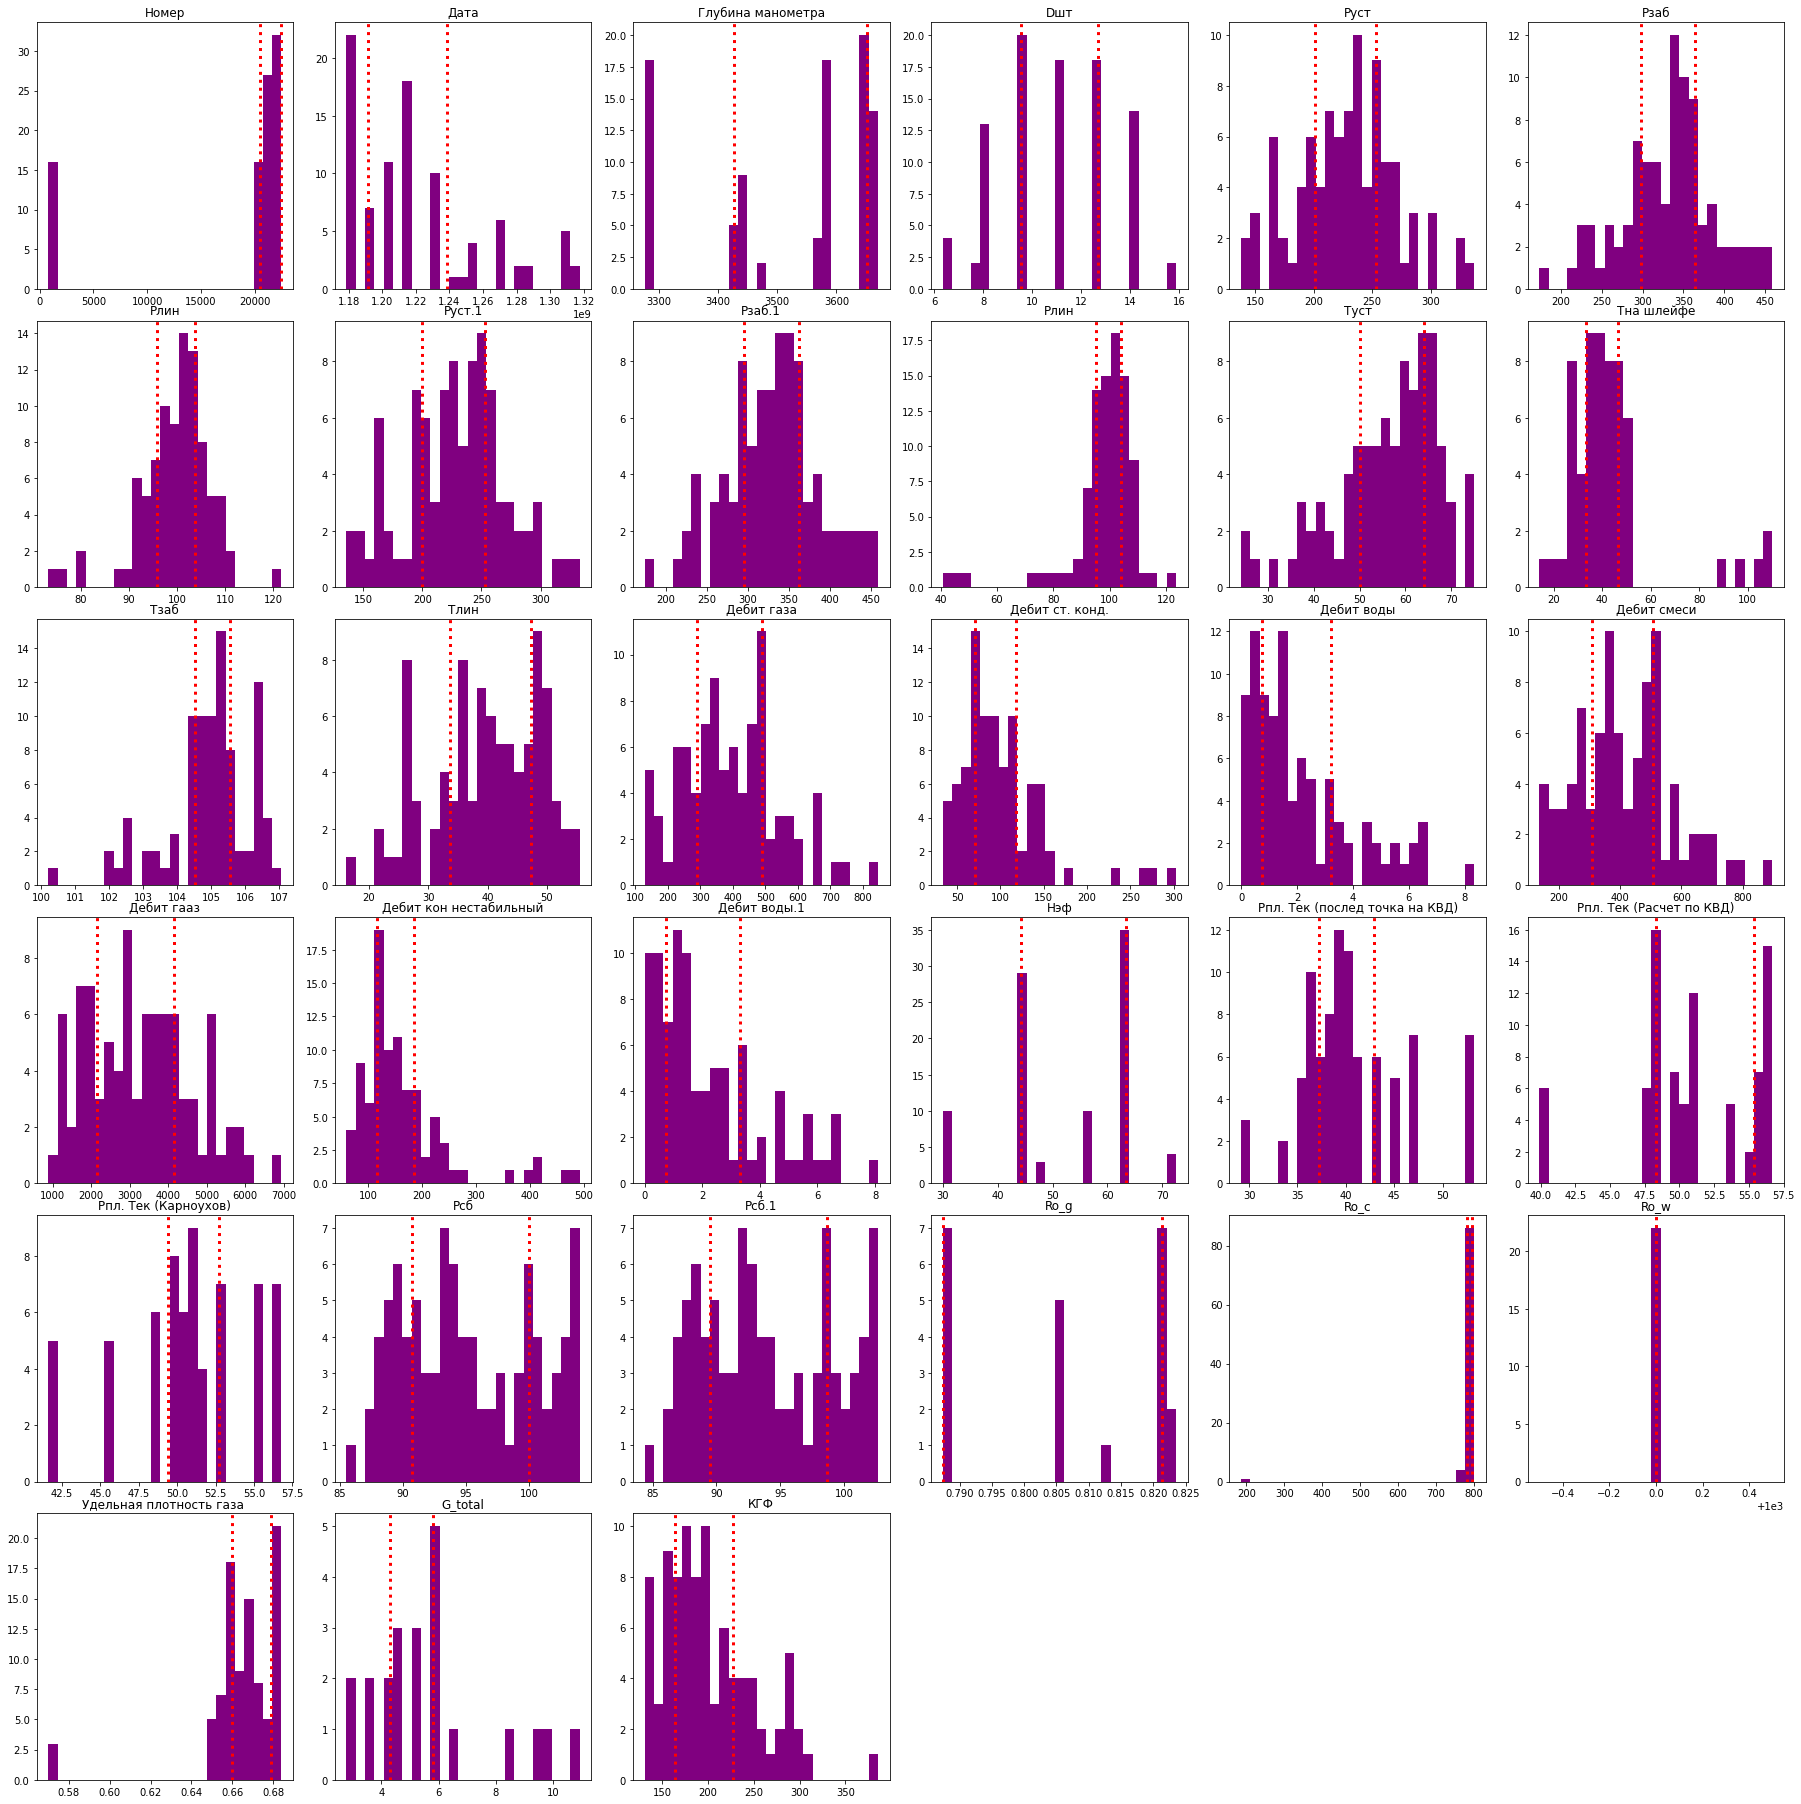

In [13]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(25, 25))
fig.tight_layout()

for i in range(6):
    for j in range(6):
        ax = axs[i][j]
        index = 6*i + j
        if index < len(df.columns):
            ax.hist(df[df.columns[index]], color='purple', bins=25)
            ax.set_title('{}'.format(df.columns[index]))
            ax.axvline(df[df.columns[index]].quantile(0.25), linestyle=":", color='r', linewidth=3)
            ax.axvline(df[df.columns[index]].quantile(0.75), linestyle=":", color='r', linewidth=3)
        else:
            ax.set_axis_off()
plt.show()

# Расчёт элементов описательной статистики для каждого признака

In [14]:
df.describe()

,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
count,91.000000,9.100000e+01,90.000000,91.000000,91.000000,90.000000,91.000000,91.000000,90.000000,91.000000,...,81.000000,64.000000,91.000000,91.000000,22.000000,91.000000,22.0,91.000000,22.000000,91.000000
mean,17943.747253,1.221656e+09,3524.086667,10.930110,228.510850,331.762255,99.770816,227.845242,330.334444,97.884364,...,50.943684,50.773438,95.235165,93.989800,0.806872,780.762857,1000.0,0.665049,5.672685,202.039700
std,7994.724887,3.940798e+07,144.474862,2.419813,42.330925,56.481235,7.335883,42.192824,56.357493,12.526296,...,4.378416,4.006591,5.166395,5.098836,0.014974,63.483950,0.0,0.020609,2.135217,49.509234
min,804.000000,1.178669e+09,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,...,39.900000,41.600000,85.500000,84.381939,0.787416,186.000000,1000.0,0.570000,2.782623,131.000000
25%,20503.000000,1.191413e+09,3427.625000,9.530000,200.818375,297.797500,95.822976,199.750000,294.625000,95.117516,...,48.300000,49.425000,90.700000,89.513940,0.787416,782.000000,1000.0,0.660000,4.315183,164.500000
50%,21303.000000,1.213488e+09,3579.000000,11.110000,231.229167,337.789172,100.800000,230.000000,334.250000,100.200000,...,50.800000,50.900000,94.300000,93.066864,0.806017,787.000000,1000.0,0.667000,5.234294,192.000000
75%,22501.000000,1.238242e+09,3652.250000,12.700000,253.162875,364.150000,103.832600,253.162875,362.150000,103.985806,...,55.400000,52.700000,99.950000,98.642981,0.821344,793.700000,1000.0,0.679000,5.818715,227.000000
max,22503.000000,1.317514e+09,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,...,56.700000,56.800000,104.000000,102.640020,0.823536,801.000000,1000.0,0.684000,10.931155,385.415949


# Отбор признаков

Посмотрим количество пропущенных значений для каждого признака

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Номер - 0%
Дата - 0%
Глубина манометра - 1%
Dшт - 0%
Руст - 0%
Рзаб - 1%
Pлин - 0%
Руст.1 - 0%
Рзаб.1 - 1%
Рлин - 0%
Туст - 0%
Тна шлейфе - 34%
Тзаб - 1%
Tлин - 0%
Дебит газа - 0%
Дебит ст. конд. - 0%
Дебит воды - 0%
Дебит смеси - 4%
Дебит гааз - 0%
Дебит кон нестабильный - 0%
Дебит воды.1 - 0%
Нэф - 0%
Рпл. Тек (послед точка на КВД) - 3%
Рпл. Тек (Расчет по КВД) - 11%
Рпл. Тек (Карноухов) - 30%
Pсб - 0%
Pсб.1 - 0%
Ro_g - 76%
Ro_c - 0%
Ro_w - 76%
Удельная плотность газа  - 0%
G_total - 76%
КГФ - 0%


Если доля пропущенных значений выше 60%, такой признак стоит игнорировать => Ro_g и Ro_w игнорируем

# Итог

Игнорируем следующие признаки:

- **Номер**, **Дата** - не подходят к цели исследования
- **Ro_g** - > 60% пропусков
- **Ro_w** - > 60% пропусков
- **Рсб.1** - по тепловой карте коррелирует с Рсб, gain_ratio одинаковый
- **Рзаб**, **Рзаб.1**, **Руст** - коррелируют между собой и Руст.1 с коэффициентом > 0.9, наибольший gain_ratio у Руст.1, поэтому его и оставляем.
- **Дебит гааз**, **Дебит газа** - коррелируют между собой и Дебит смеси с коэффициентом > 0.9, наибольший gain_ratio у Дебит смеси, поэтому его и оставляем
- **Дебит ст. конд.** - коррелирует с Дебит кон нестабильный с коэф. 0.87, у второго gain_ratio больше
- **Дебит воды** - коррелирует с Дебит воды.1 с коэф. 0.98, у второго gain_ratio больше
- **Рпл. Тек (Карнаухов)** - коррелируют с Рпл. Тек (Расчёт по КВД) с коэф 0.95, у второго gain_ratio больше, но пропусков у первого больше
- **Дебит газа** - коррелирует с Dшт с коэф. 0.86, у второго gain_ratio больше
- **Ro_c** - по анализу графика распределения
- **Глубина манометра** - по анализу графика распределения
- **Нэф** - по анализу графика распределения